# Inaugural Project

In this project, we consider an exchange economy with two consumers, A and B, and two goods, $x_1$ and $x_2$. Each consumer has an initial endowment of these goods, $\omega^A$ and $\omega^B$, and the total endowment of each good is always one. The model involves calculating utility and demand functions under given price conditions, aiming to find the market equilibrium where both goods' markets clear.

**Model Parameters**
- **Alpha ($\alpha$):** `1/3`
- **Beta ($\beta$):** `2/3`
- **Numeraire:** $p_2$ is set to be numeraire, $p_2$ = 1.

The project will guide through solving this model, simulating scenarios, and interpreting the outcomes within the given economic framework.

# Imports and setup


In [2]:
# Importing libraries for numerical operations, data manipulation, and visualization
import numpy as np  # For numerical operations like arrays
import pandas as pd  # For structured data operations
from scipy.optimize import minimize  # For numerical optimization.

# Enabling autoreload in Jupyter to auto-update imported modules on code execution
%load_ext autoreload
%autoreload 2

# Importing matplotlib for plotting and setting default plot aesthetics and font size
import matplotlib.pyplot as plt
plt.rcParams.update({
    "axes.grid": True, "grid.color": "black",
    "grid.alpha": 0.25, "grid.linestyle": "--", 'font.size': 14
})

# Importing a custom module specific to this project
from inauguralproject import ExchangeEconomyClass

# Creating an instance of ExchangeEconomyClass for access to its methods and attributes.
econ = ExchangeEconomyClass()

# Importing optimize from scipy for mathematical optimization tasks
from scipy import optimize


## Question 1

In this question, we examine the allocation of two goods between consumers A and B using an Edgeworth box. It is implemented via the accompanying Python code.

1. **Utility Functions**: We define `utility_A` and `utility_B` for consumers A and B, which capture their preferences for goods $x_1$ and $x_2$.

2. **Initial Endowments**: We assign an initial quantity of each good to both consumers, denoted by `omega_A1`, `omega_A2` for consumer A and `omega_B1`, `omega_B2` for consumer B.

3. **Pareto Improvements**: The code calculates allocations ($x^A_1$, $x^A_2$) that make no consumer worse off than at their initial endowment levels. This involves ensuring that each consumer's utility with the given allocation is at least as high as the utility with their initial endowment.

4. **Edgeworth Box Plot**: Using Matplotlib, we visualize the set of Pareto efficient allocations. Points within the Edgeworth box represent potential distributions of goods between the two consumers that satisfy the Pareto efficiency criterion.



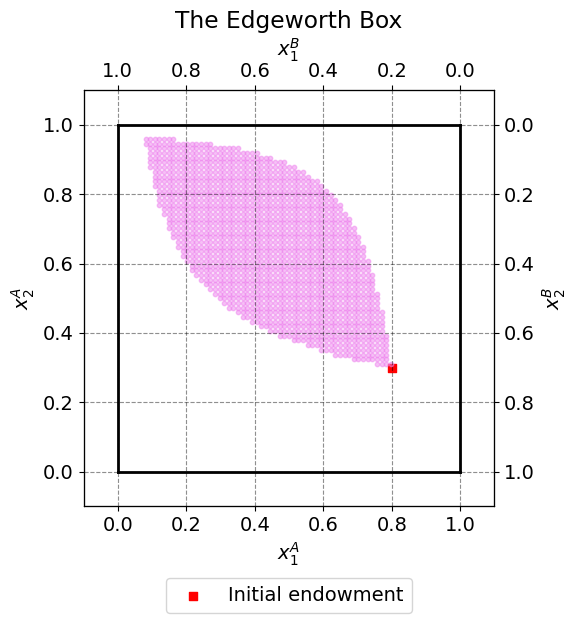

In [9]:
# Initialize the exchange economy class instance
Econ = ExchangeEconomyClass()

# Access the parameters set within the Econ instance
par = Econ.par

# Define the number of points in the grid for consumption possibilities and create those grids
N = 75 # Number of points
x1A, x2A = np.linspace(0,1,N), np.linspace(0,1,N)

# Calculate Pareto improvements using the grid points
pareto_improve = Econ.pareto_improve(x1A, x2A)

# Extract the x and y coordinates from the Pareto improvements for plotting
x_coords = [pair[0] for pair in pareto_improve]
y_coords = [pair[1] for pair in pareto_improve]

# Define the total endowment for each good
w1bar = 1.0 # Total endowment of good 1
w2bar = 1.0 # Total endowment of good 2

# Setup the figure for plotting
fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax1 = fig.add_subplot(1, 1, 1)

# Label the axes for consumer A's goods
ax1.set_xlabel("$x_1^A$")
ax1.set_ylabel("$x_2^A$")

# Set up twin axes for plotting consumer B's goods on the same plot with reversed axes
temp = ax1.twinx()
temp.set_ylabel("$x_2^B$")
ax2 = temp.twiny()
ax2.set_xlabel("$x_1^B$")

# Add a title to the plot
plt.title('The Edgeworth Box')

# Enable the grid for easier interpretation of the plot
ax1.grid(True)

# Adjust the layout of the plot for better presentation
plt.tight_layout()

# Plot the initial endowment for consumer A and the Pareto improvements
ax1.scatter(par.w1A, par.w2A, marker='s', color='red', label='Initial endowment')
ax1.scatter(x_coords, y_coords, s=10, alpha=0.5, color='violet')

# Draw the borders of the Edgeworth box to represent the limits of the total endowments
ax1.plot([0, w1bar], [0, 0], lw=2, color='black') # Bottom border
ax1.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black') # Top border
ax1.plot([0, 0], [0, w2bar], lw=2, color='black') # Left border
ax1.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black') # Right border

# Set the limits of the plot area, including a slight margin to see the box
ax1.set_xlim([-0.1, w1bar + 0.1])
ax1.set_ylim([-0.1, w2bar + 0.1])    
ax2.set_xlim([w1bar + 0.1, -0.1]) # Reversed for B's perspective
ax2.set_ylim([w2bar + 0.1, -0.1]) # Reversed for B's perspective

# Add a legend to the plot for identifying the initial endowment point
ax1.legend(frameon=True, loc='upper center', bbox_to_anchor=(0.5, -0.15))

# Show the plot
plt.show()


The analysis reveals a pattern in the distribution of Pareto efficient outcomes, favoring scenarios where consumer A predominantly consumes more of good 2, while consumer B's consumption leans towards the opposite. This ensures that their combined consumption does not surpass the total available resources.

# Question 2

This code calculates and visualizes the market clearing errors for different price vectors in the set $ P_1$:

1. **Define Price Range**: It first defines the range for $p_1$ using the given specifications.

2. **Calculate Errors**: Then, it iterates over each $p_1$ in $P_1$ and calculates the market clearing errors using the `check_market_clearing` method defined in the `ExchangeEconomyClass`.

3. **Store Errors**: The market clearing errors for each $p_1$ are stored in lists.

4. **Plot Errors**: Finally, it plots the market clearing errors $\varepsilon_1$ and $\varepsilon_2$ against $p_1$. 



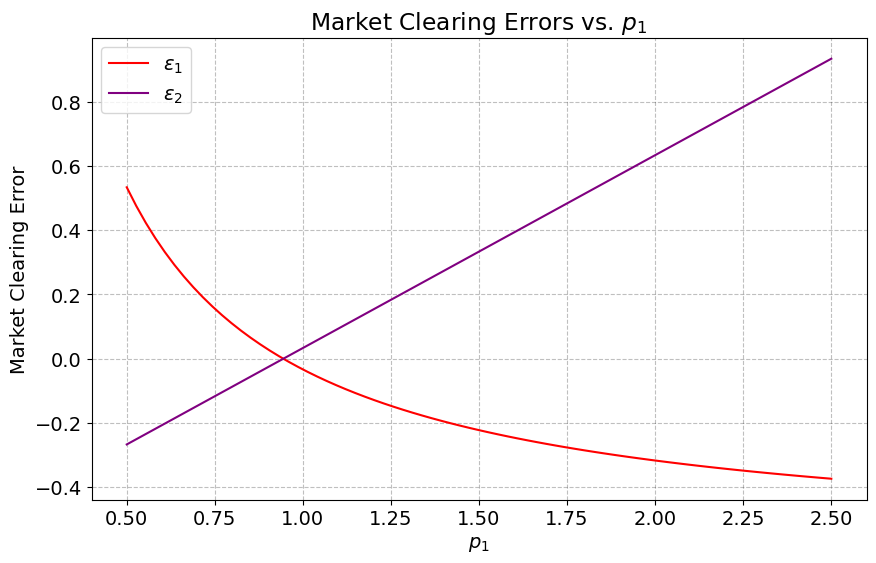

In [15]:
# Define the number of points in the grid for optimization analysis
N = 75
P1 = np.linspace(0.5, 2.5, N)

# Initialize lists to store market clearing errors
epsilon1_values = []
epsilon2_values = []

# Iterate over a range of prices for good 1 and calculate the market clearing error for each
for p1 in P1:
    epsilon1, epsilon2 = econ.check_market_clearing(p1)  # Assuming p2 is fixed at 1 for simplicity
    epsilon1_values.append(epsilon1)
    epsilon2_values.append(epsilon2)

# Plotting the market clearing errors
plt.figure(figsize=(10, 6))
plt.plot(P1, epsilon1_values, label='$\epsilon_1$', color='red')
plt.plot(P1, epsilon2_values, label='$\epsilon_2$', color='purple')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing Error')
plt.title('Market Clearing Errors vs. $p_1$')
plt.legend()
plt.grid(True)
plt.show()

# Question 3

The market clearing price—where supply equals demand—ensuring an efficient market without surplus or shortage. Leveraging Walras's law, which states equilibrium in one market implies equilibrium in all, we focus on finding the equilibrium in the first market to simplify our analysis.

We use SciPy's `optimize.root_scalar` function for this task, a tool for root-finding problems aimed at identifying the price that balances supply and demand. 

The `find_market_equilibrium_price` method encapsulates this process by:
- Defining an objective function to compute the market clearing error at a given price.
- Employing `root_scalar` with a bisecting strategy to find the equilibrium price.
- Evaluating and reporting the market clearing error and the equilibrium price, thus confirming market efficiency.

This concise approach not only identifies the market clearing price but showcases the efficiency of computational methods in resolving economic models.

In [20]:
econ.find_market_equilibrium_price()

Optimal allocation for A: x1 = 0.576, x2 = 0.844, Utility = 0.743


(0.5757450601538892, 0.8444377859258702)

# Question 4
#  4a


In [24]:
# Initialize placeholders for the optimal price, allocation, and maximum utility.
optimal_price = ()
optimal_allocation = ()
max_utility = float("-inf")  # Start with the lowest possible utility as a comparison baseline.

# Iterate over each possible price p1 within the predefined list or array P1.
for p1 in P1:
    # Calculate demand for agent B given the current price p1.
    x1B, x2B = econ.demand_B(p1)

    # Ensure that the remaining goods for agent A are positive to maintain feasibility.
    if 1 - x1B > 0 and 1 - x2B > 0:
        # Calculate utility for agent A given the remaining goods.
        utility_A = econ.utility_A(1 - x1B, 1 - x2B)

        # If this utility is higher than the current max utility, update the optimal values.
        if utility_A > max_utility:
            max_utility = utility_A  # Update maximum utility found so far.
            optimal_price = p1  # Update optimal price to the current price.
            optimal_allocation = (1 - x1B, 1 - x2B)  # Update optimal allocation for agent A.

# After iterating through all prices, print the optimal price, allocation, and utility.
print(f"The optimal price is {optimal_price:.3f}, and the optimal allocation for A is x1={optimal_allocation[0]:.3f} and x2={optimal_allocation[1]:.3f}.")
print(f"Resulting in utility {max_utility:.3f} for A.")

# Saving the optimal allocation for agent A for potential future use.
x1A_opt_4a = optimal_allocation[0]
x2A_opt_4a = optimal_allocation[1]


The optimal price is 1.905, and the optimal allocation for A is x1=0.622 and x2=0.640.
Resulting in utility 0.634 for A.


#  4b


In [27]:
# Define agent A's utility function based on price p1.
def uA(p1):
    # Calculate demand for agent B given p1 and derive A's utility.
    x1B, x2B = econ.demand_B(p1)
    return econ.utility_A(1 - x1B, 1 - x2B)

# Initial price guess for optimization.
new_price = [1]

# Objective function: Maximize A's utility by minimizing its negative.
obj_func = lambda p1: -uA(p1)

# Constraint ensuring B's utility is non-negative. Note: Needs correction.
constraint = lambda p1: econ.utility_B(1 - x1B, 1 - x2B)
constraints = {'type': 'ineq', 'fun': constraint}

# Perform optimization to find best price p1.
res = optimize.minimize(obj_func, new_price, method='SLSQP', constraints=constraints)
p1_best_scipy = res.x[0]  # Optimal price found.
ua_best_scipy = -res.fun  # Max utility for A at optimal price.

# Calculate optimal allocation for A based on the best price.
opt_best_scipy = (1 - x1B, 1 - x2B)

# Print optimal price and allocation for A.
print(f"The optimal price is {p1_best_scipy:.3f}, and the optimal allocation for A is x1={opt_best_scipy[0]:.3f} and x2={opt_best_scipy[1]:.3f}.")
print(f"Resulting in utility {ua_best_scipy:.3f} for A.")

# Save optimal allocation for A.
x1A_opt_4b = opt_best_scipy[0]
x2A_opt_4b = opt_best_scipy[1]


The optimal price is 1.897, and the optimal allocation for A is x1=0.680 and x2=0.600.
Resulting in utility 0.634 for A.


# Question 5
# 5a


In [41]:
# Assign Pareto improvements to C for analysis
C = pareto_improve

# Initialize variables to track maximum utility and the best allocation
max_utility_A = -np.inf  # Start with the lowest possible value
best_allocation_A = None  # Placeholder for the optimal allocation

# Iterate over each possible allocation in the set C
for allocation in C:
    # Incorrectly calculates utility at A's initial endowment instead of the current allocation
    current_utility_A = econ.utility_A(par.w1A, par.w2A)  
    # Update max utility and best allocation if current utility is higher
    if current_utility_A > max_utility_A:
        max_utility_A = current_utility_A
        best_allocation_A = allocation

# Extract optimal allocations for agent A from the best allocation found
x1A_opt_5a = best_allocation_A[0]
x2A_opt_5a = best_allocation_A[1]

# Print the optimal allocations and the maximum utility for agent A
print(f'The utility is maximised for agent A when x1 = {x1A_opt_5a:.3f} and x2 = {x2A_opt_5a:.3f} with u = {econ.utility_A(x1A_opt_5a,x2A_opt_5a):.3f}')


The utility is maximised for agent A when x1 = 0.081 and x2 = 0.946 with u = 0.417


In [45]:
# Determine the unrestricted optimal allocation for Agent A while ensuring Agent B's utility is not reduced from their initial state.

x1A_opt_5b, x2A_opt_5b = econ.find_optimal_allocation()


Optimal allocation for A: x1A = 0.6809, x2A = 0.7251
Utility for A: 0.7100
Utility for B: 0.3037


# Question 6
# 6a

In [48]:
# Solve for the optimal allocation as determined by a social planner's perspective.
x1A_sp, x2A_sp = econ.solve_social_planner()

# Print the optimal allocation for Agent A, as determined by the social planner.
print(f'The allocation for A is: (x1A,x2A) = ({x1A_sp:.3f},{x2A_sp:.3f})')

# Calculate and print the corresponding allocation for Agent B, ensuring the total allocation remains constant.
print(f'The allocation for B is: (x1B,x2B) = ({1 - x1A_sp:.3f},{1 - x2A_sp:.3f})')

# Compute and print Agent A's utility at the social planner's optimal allocation.
print(f'The utility is for A is: {econ.utility_A(x1A_sp,x2A_sp):.3f}')

# Compute and print Agent B's utility, given the remaining goods after A's allocation.
print(f'The utility is for B is: {econ.utility_B(1 - x1A_sp,1 - x2A_sp):.3f}')



[0.2, 0.6]
The allocation for A is: (x1A,x2A) = (0.332,0.666)
The allocation for B is: (x1B,x2B) = (0.668,0.334)
The utility is for A is: 0.528
The utility is for B is: 0.530


# 6b

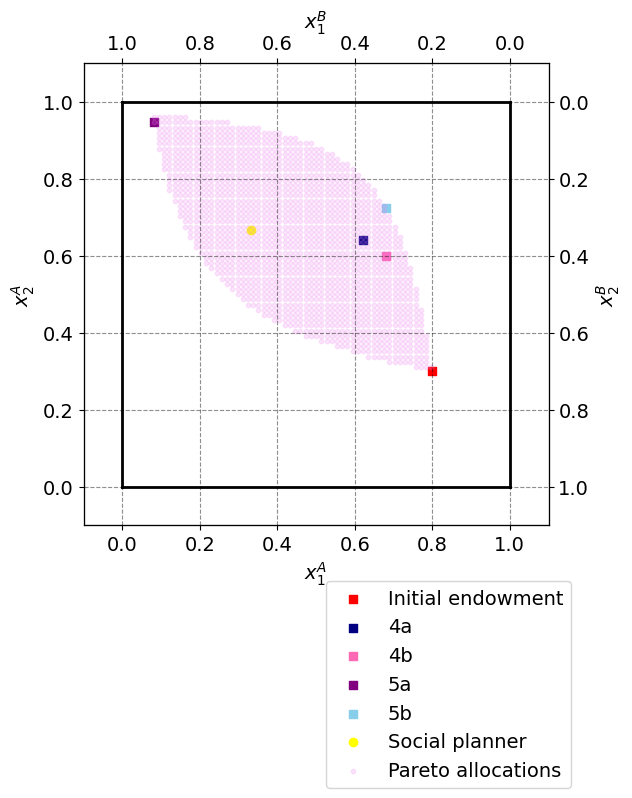

In [94]:
# Set the total available endowment of goods 1 and 2
w1bar = 1.0
w2bar = 1.0

# Calculate Pareto improvements using the grid points
pareto_improve = Econ.pareto_improve(x1A, x2A)

# Extract the x and y coordinates from the Pareto improvements for plotting
x_coords = [pair[0] for pair in pareto_improve]
y_coords = [pair[1] for pair in pareto_improve]

# Initialize the figure for plotting the allocations and endowments
fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# Configure axis labels for goods allocated to agents A and B
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")
temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")

# Mark the initial endowment on the plot
ax_A.scatter(par.w1A, par.w2A, marker='s', color='red', label='Initial endowment')

# Plot optimal allocations from various scenarios and strategies:
# Allocation from scenario 4a
ax_A.scatter(x1A_opt_4a, x2A_opt_4a, marker='s', color='navy', label='4a')

# Allocation from scenario 4b 
ax_A.scatter(x1A_opt_4b, x2A_opt_4b, marker='s', color='hotpink', label='4b')

# Allocation from scenario 5a
ax_A.scatter(x1A_opt_5a, x2A_opt_5a, marker='s', color='purple', label='5a')

# Allocation from scenario 5b
ax_A.scatter(x1A_opt_5b, x2A_opt_5b, marker='s', color='skyblue', label='5b')

# Allocation determined by a social planner
ax_A.scatter(x1A_sp, x2A_sp, marker='o', color='yellow', label='Social planner')

# Marking possible Pareto allocations
ax_A.scatter(x_coords, y_coords, s=10, alpha=0.2, color='violet', label='Pareto allocations')

# Draw the limits/boundaries of the total endowments
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Set plot limits to slightly beyond the endowment bounds for visual clarity
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Display the legend with labels for each data point type
ax_A.legend(frameon=True, loc='upper left', bbox_to_anchor=(0.5, -0.1))


# Question 7


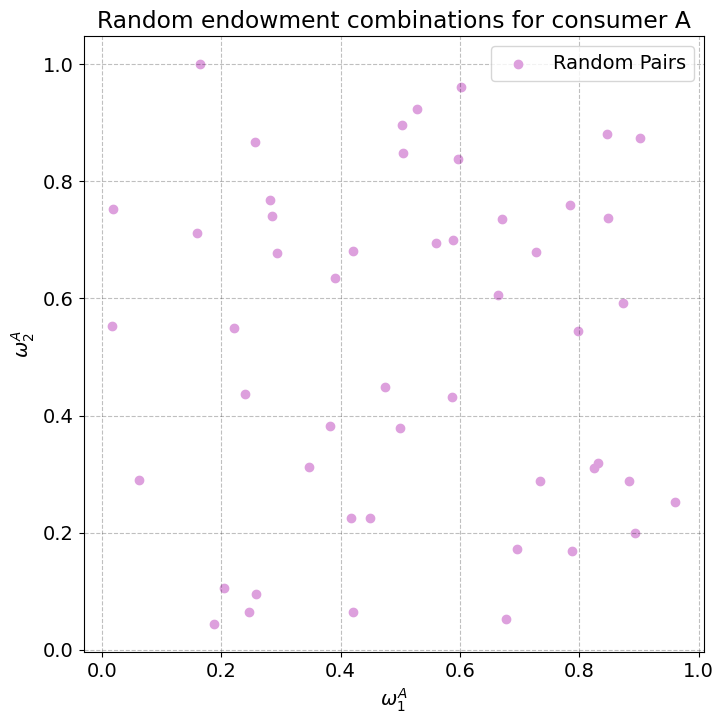

In [104]:
# Set the random seed for reproducibility of results
np.random.seed(2024)

# Initialize an empty list to store pairs of random numbers
W_pairs = []
for _ in range(50):  # Iterate to generate 50 pairs
    # Generate a pair of random numbers each in the range [0, 1]
    pair = (np.random.uniform(0, 1), np.random.uniform(0, 1))
    W_pairs.append(pair)  # Add the generated pair to the list

# Unpack the pairs into two lists for plotting
x_values, y_values = zip(*W_pairs)

# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(x_values, y_values, color='plum', marker='o', label='Random Pairs')
plt.title('Random endowment combinations for consumer A')
plt.xlabel('$\omega_{1}^{A}$')
plt.ylabel('$\omega_{2}^{A}$')
plt.grid(True)
plt.legend()
plt.show()


# Question 8

  0: p1 =   1.00244339 -> excess demand ->     0.17672357
  1: p1 =   1.02977900 -> excess demand ->     0.02733561
  2: p1 =   1.03858618 -> excess demand ->     0.00880718
  3: p1 =   1.04163148 -> excess demand ->     0.00304530
  4: p1 =   1.04270714 -> excess demand ->     0.00107566
   ...
 16: p1 =   1.04330213 -> excess demand ->     0.00000000
  0: p1 =   0.70064727 -> excess demand ->    -0.34265486
  1: p1 =   0.58359066 -> excess demand ->    -0.11705661
  2: p1 =   0.60431099 -> excess demand ->     0.02072033
  3: p1 =   0.59675544 -> excess demand ->    -0.00755555
  4: p1 =   0.59928307 -> excess demand ->     0.00252763
   ...
 16: p1 =   0.59863164 -> excess demand ->     0.00000001
  0: p1 =   0.63891876 -> excess demand ->     0.04028712
  1: p1 =   0.62632694 -> excess demand ->    -0.01259182
  2: p1 =   0.62953172 -> excess demand ->     0.00320478
  3: p1 =   0.62865611 -> excess demand ->    -0.00087561
  4: p1 =   0.62889122 -> excess demand ->     0.00023510


(1.1, -0.1)

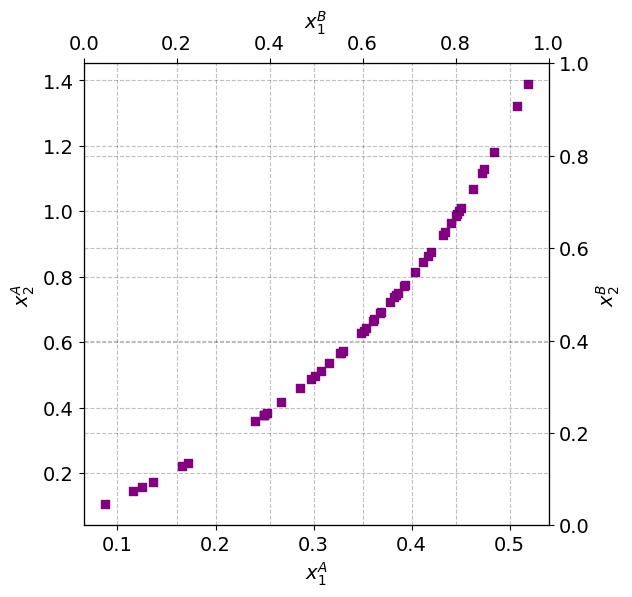

In [107]:
# Initialize lists for storing solutions and allocations
sol_entire = []
sol_allocation = []

# Loop to iterate through pairs of initial endowments
for i in range(50):
    # Assign current endowment pair to agent A
    w1A, w2A = W_pairs[i]
    econ.par.w1A=w1A
    econ.par.w2A=w2A
     # Find equilibrium price via Walras' law
    p1 = econ.walras(p1, eps=1e-8, maxiter=500)
    # Determine demand for agent A at equilibrium price
    x1a, x2a = econ.demand_A(p1)
    # Store solution and allocation details
    sol_entire.append((w1A, w2A, p1, x1a, x2a))
    sol_allocation.append((x1a, x2a))
    i+=1


# Prepare allocations for plotting
sol_allocation = np.array(sol_allocation)

# Set up the plot
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax1 = fig.add_subplot(1, 1, 1)

# Label axes for agent A
ax1.set_xlabel("$x_1^A$")
ax1.set_ylabel("$x_2^A$")

# Configure twin axes for agent B
temp = ax1.twinx()
temp.set_ylabel("$x_2^B$")
ax2 = temp.twiny()
ax2.set_xlabel("$x_1^B$")

# Draw endowment boundaries
ax1.scatter(sol_allocation[:, 0], sol_allocation[:, 1], marker='s',color='purple',label='Initial endowment')

# Set viewing limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])